## Student Information
Name: 李享 Louis

Student ID: 111062699

GitHub ID:

---

## Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# First Part

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [ ]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [ ]:
# Answer here

# In Python, there's nothing called null, instead of None, so id:E pass
# but numpy have supply a np.nan so id:A pass it
# None means there have nothing, so id:B pass it because there truly have nothing
# id:C, id:D, id:F return False because they both have a string in 'missing_example' field
# name a string in 'None', 'NaN' or empty string '' won't let it have same effect like None or NaN 
# because it's still a string type

print(type(str) == type(None))

False


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here
# actually, current X dataframe is same as original X dataframe
# but it was used for many operation such as iloc, loc, duplicated...
# it changes only when duplicated, it add some dummy record
# but remove after show X.duplicated()'s result


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

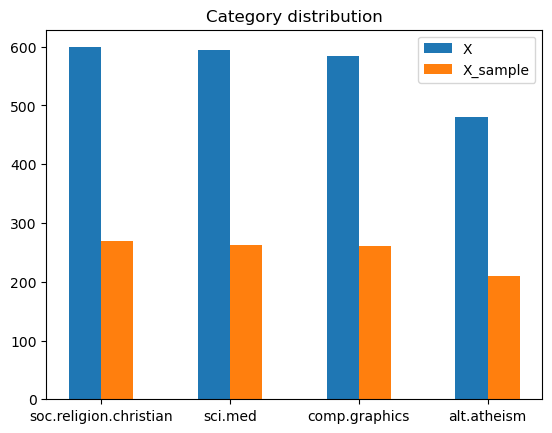

In [ ]:
# Answer here
categories_list = X.category_name.value_counts().index.tolist() # https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts
r =  np.arange(len(categories_list))
width = 0.25

plt.bar(r, X.category_name.value_counts(), width = width, label = "X")
plt.bar(r + width, X_sample.category_name.value_counts(), width = width, label = "X_sample")

plt.xticks(r + width/2, categories_list)
plt.title("Category distribution")
plt.legend()
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Answer here
data = X_counts[4].toarray()
data.resize(data.shape[1])
pos, next_one = 0, False
for idx, x in enumerate(data):
    if x == 1 and next_one == False:
        next_one = True
        continue
    elif x == 1 and next_one == True:
        pos = idx
        break
count_vect.get_feature_names_out()[pos]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

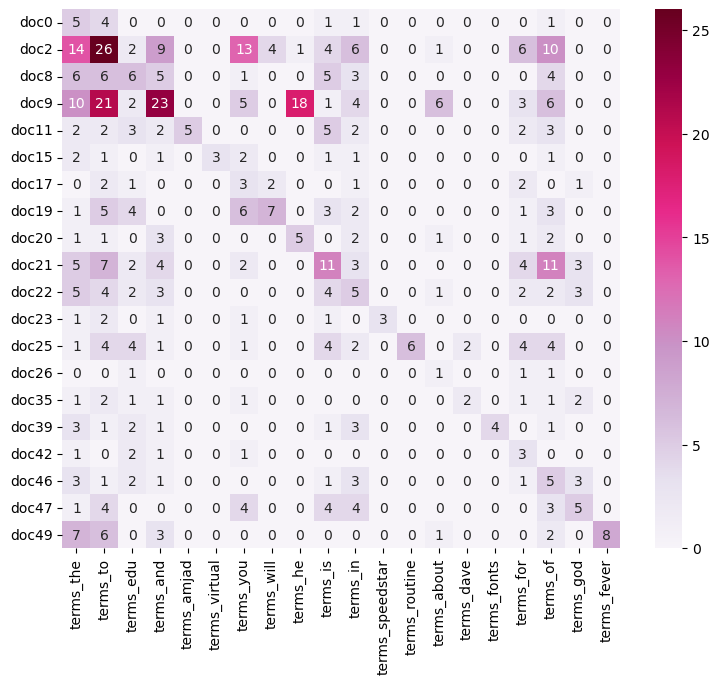

In [ ]:
# Answer here
# I create a heatmap that include 20 'different' words that occured most times start at text[0]
# if occured word that has been recorded, then skip it and calculate


word_num = 20 # change word_num to have fun :D
feature_names = count_vect.get_feature_names_out() # preload get_feature_names_out() for future using
max_idx = -1

words_occur_most_times = []
appeard_idx = []
vmax = -1 # for heatmap

for idx, i in enumerate(X_counts[:]):
    max_idx = np.argmax(i) # return word's index which appeared most times
    if len(appeard_idx) == word_num: # if get 20 words leave loop
        break

    # if word has not been recorded, then record it
    if max_idx not in appeard_idx:
        appeard_idx.append(max_idx)
        vmax = np.max(i) if np.max(i) > vmax else vmax
        words_occur_most_times.append({ # use json format to store word's info
            "idx": idx,
            "times": np.max(i),
            "word index": max_idx,
            "word": feature_names[max_idx],
        })

X_counts_toarray = X_counts.toarray() 
my_plot_x, my_plot_y, my_plot_z = [], [], []

for i in words_occur_most_times:
    my_plot_x.append("terms_" + str(i["word"]))
    my_plot_y.append("doc" + str(i["idx"]))
    buf = []
    for j in words_occur_most_times:
        buf.append(X_counts_toarray[i["idx"], j["word index"]])
    my_plot_z.append(buf)


# thiangle elements will be the biggest element in each row
my_df_todraw = pd.DataFrame(my_plot_z, columns = my_plot_x, index = my_plot_y)
plt.subplots(figsize = (9, 7))
ax = sns.heatmap(my_df_todraw, 
                 cmap = "PuRd",
                 vmin = 0, vmax = vmax, annot = True)


### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

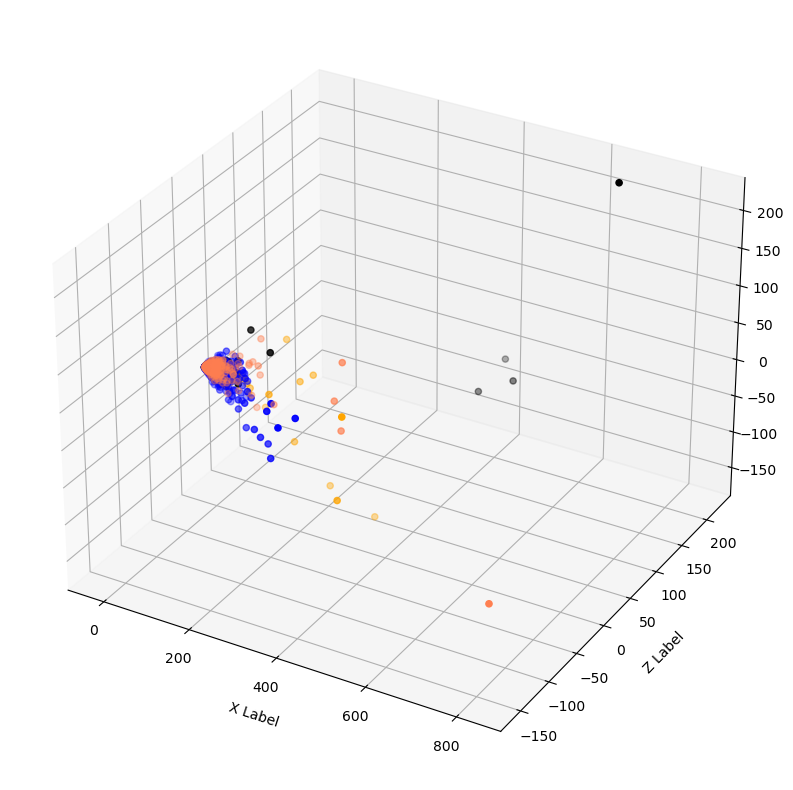

In [ ]:
# Answer here
X_3D_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_3D_reduced[X['category_name'] == category].T[0]
    ys = X_3D_reduced[X['category_name'] == category].T[1]
    zs = X_3D_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()


### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here
import plotly.express as px

fig = px.bar(x = count_vect.get_feature_names_out()[:300],
             y = term_frequencies[:300],
             width = 10000,
             height = 800)

fig.show()


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [ ]:
# Answer here
import plotly.express as px

# from 300 datas to 30 datas
fig = px.bar(x = count_vect.get_feature_names_out()[:30],
             y = term_frequencies[:30],
             width = 1000,
             height = 800)

fig.show()


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
# Answer here

# sort all term_frequencies and select front 300 datas
data = term_frequencies[:].tolist()
data_indexes = sorted(range(len(data)), key=lambda k: data[k], reverse=True)[:300]

fig = px.bar(x = count_vect.get_feature_names_out()[data_indexes],
             y = term_frequencies[data_indexes],
             width = 1000,
             height = 800)

fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


# Second Part

In [ ]:
## Begin Assignment Here
import pandas as pd
categories = []
df = pd.read_csv('./amazon_cells_labelled.txt', delimiter = '\t', names=[ "sentence", "score"], header = None)
    
# DataFrame structure 
# | sentence |  score  |
# |  string  |  number |
df[:5]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


##  ＊ Exercise 1：  ##

In [3]:
# Exercise 1
for d in df.sentence[:3]:
    print(d)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


## ＊Exercise 2： ##

In [4]:
#Answer here
print(df[:20]['sentence'])

print("-------------------------------------------------------------------")

output = ['score', 'sentence']
print('loc testing')
print(df.loc[:10, output])

print("-------------------------------------------------------------------")

print("iloc testing")
print(df[df['score'] == 1].iloc[::2][:5])

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
11    He was very impressed when going from the orig...
12    If the two were seperated by a mere 5+ ft I st...
13                             Very good quality though
14    The design is very odd, as the ear "clip" is n...
15    Highly recommend for any one who has a blue to...
16                  I advise EVERYONE DO NOT BE FOOLED!
17                                     So Far So

## ＊Exersize 3 ##

In [5]:
# Exercise 3
df[df['score'] == 1].iloc[::10][:5]

,sentence,score
1,"Good case, Excellent value.",1
21,I bought this to use with my Kindle Fire and a...,1
44,Excellent bluetooth headset.,1
61,I really recommend this faceplates since it lo...,1
78,"I love this phone , It is very handy and has a...",1


## ＊Exercise 4 ##

In [6]:
# Exercise 4
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
995    (The amoung of missing records is: , 0)
996    (The amoung of missing records is: , 0)
997    (The amoung of missing records is: , 0)
998    (The amoung of missing records is: , 0)
999    (The amoung of missing records is: , 0)
Length: 1000, dtype: object

## ＊Exercise 5 ##

Exersize 5 is about explane why sometimes .isnull() didn't work and I have explain in Master.ipynb

## ＊Exercise 6 ##

Same reason as Exercise 5, this time is explain X dataframe's change

## ＊Exercise 7 ##

<AxesSubplot: title={'center': 'Category distribution'}>

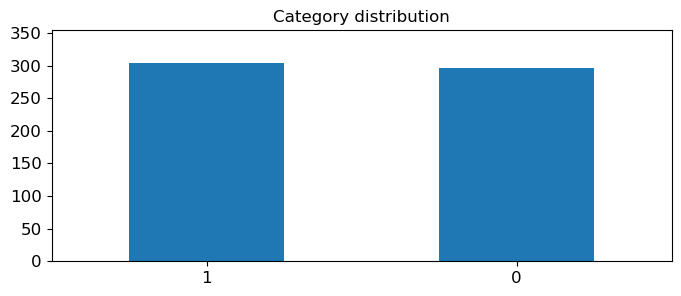

In [7]:

df.drop_duplicates(keep=False, inplace=True)
df_sample = df.sample(n=600)

# plot barchart for X_sample
df_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, max(df_sample.score.value_counts()) + 50],
                                           rot = 0, fontsize = 12, figsize = (8, 3))

## ＊Exercise 8 ##

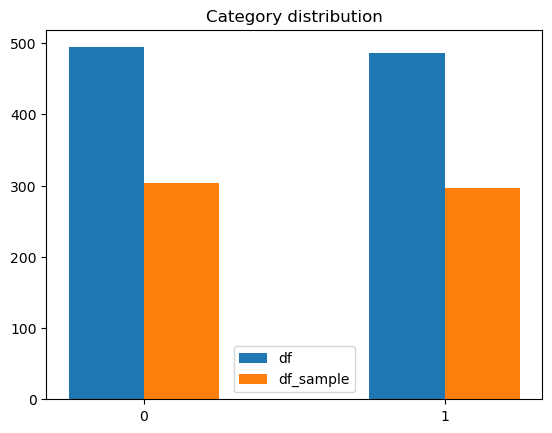

In [8]:
import numpy as np
import matplotlib.pyplot as plt

score_list = df.score.value_counts().index.tolist() # https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts
r =  np.arange(len(score_list))
width = 0.25

plt.bar(r, df.score.value_counts(), width = width, label = "df")
plt.bar(r + width, df_sample.score.value_counts(), width = width, label = "df_sample")

plt.xticks(r + width/2, score_list)
plt.title("Category distribution")
plt.legend()
plt.show()

## ＊Exercise 9 ##

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix

analyze = count_vect.build_analyzer()
analyze(df.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

## ＊Exercise 10 ##

Exercise 10 is basic on the dataset which Master.ipynb used, so I skip it

## ＊Exercise 11

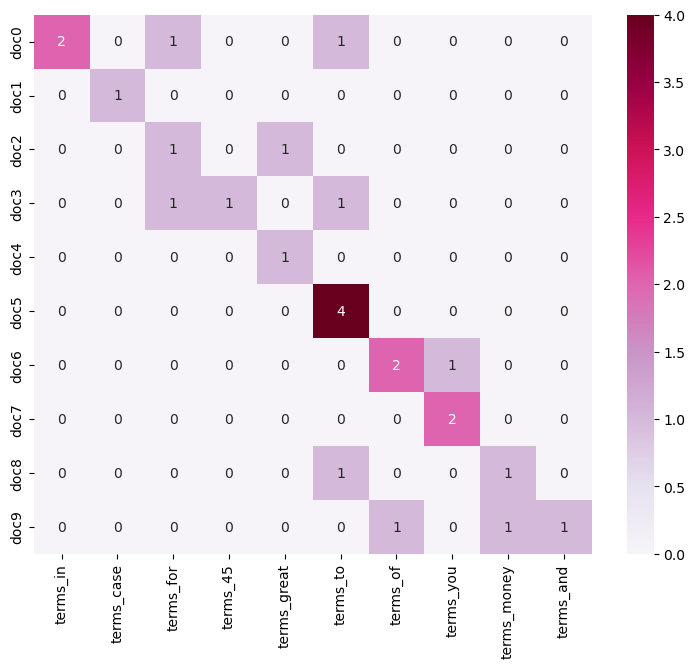

In [10]:
# I create a heatmap that include 20 'different' words that occured most times start at text[0]
# if occured word that has been recorded, then skip it and calculate

import seaborn as sns

word_num = 10 # change word_num to have fun :D
feature_names = count_vect.get_feature_names_out() # preload get_feature_names_out() for future using
max_idx = -1

words_occur_most_times = []
appeard_idx = []
vmax = -1 # for heatmap

for idx, i in enumerate(df_counts[:]):
    max_idx = np.argmax(i) # return word's index which appeared most times
    if len(appeard_idx) == word_num: # if get 20 words leave loop
        break

    # if word has not been recorded, then record it
    if max_idx not in appeard_idx:
        appeard_idx.append(max_idx)
        vmax = np.max(i) if np.max(i) > vmax else vmax
        words_occur_most_times.append({ # use json format to store word's info
            "idx": idx,
            "times": np.max(i),
            "word index": max_idx,
            "word": feature_names[max_idx],
        })

df_counts_toarray = df_counts.toarray() 
my_plot_x, my_plot_y, my_plot_z = [], [], []

for i in words_occur_most_times:
    my_plot_x.append("terms_" + str(i["word"]))
    my_plot_y.append("doc" + str(i["idx"]))
    buf = []
    for j in words_occur_most_times:
        buf.append(df_counts_toarray[i["idx"], j["word index"]])
    my_plot_z.append(buf)


# thiangle elements will be the biggest element in each row
my_df_todraw = pd.DataFrame(my_plot_z, columns = my_plot_x, index = my_plot_y)
plt.subplots(figsize = (9, 7))
ax = sns.heatmap(my_df_todraw, 
                 cmap = "PuRd",
                 vmin = 0, vmax = vmax, annot = True)


## ＊Exercise 12 ##

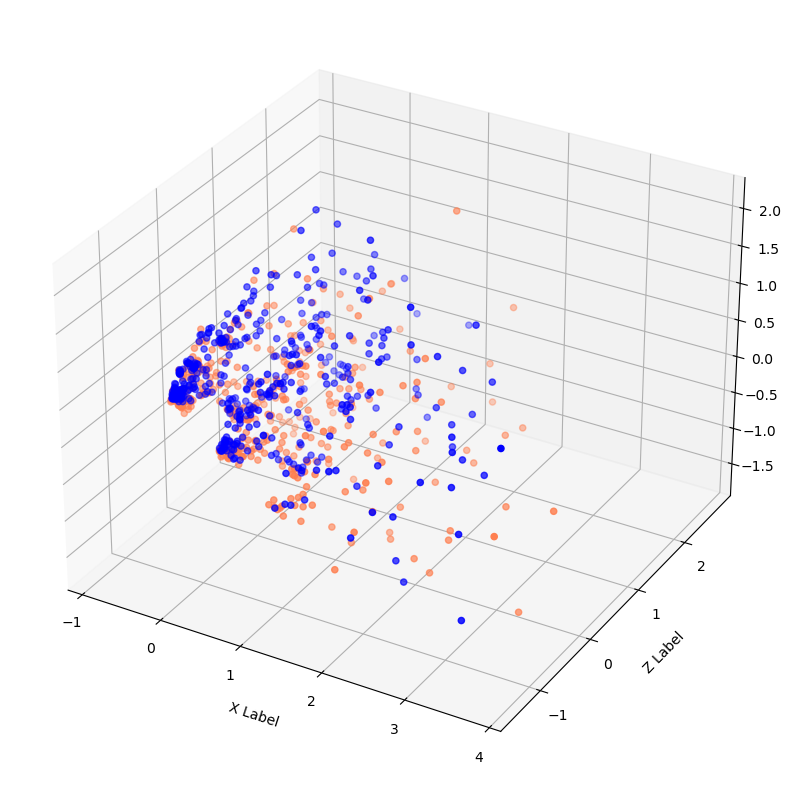

In [11]:
from sklearn.decomposition import PCA

df_3D_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())
categories = [0, 1]
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = df_3D_reduced[df['score'] == category].T[0]
    ys = df_3D_reduced[df['score'] == category].T[1]
    zs = df_3D_reduced[df['score'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()


## ＊Exercise 13 ##

In [12]:
term_frequencies = []
for j in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term

import plotly.express as px

fig = px.bar(x = count_vect.get_feature_names_out()[:50],
             y = term_frequencies[:50],
             width = 1000,
             height = 500)

fig.show()


## ＊Exercise 15 ##

In [13]:
# sort all term_frequencies and select front 300 datas
data = term_frequencies[:].tolist()
data_indexes = sorted(range(len(data)), key=lambda k: data[k], reverse=True)[:30]

fig = px.bar(x = count_vect.get_feature_names_out()[data_indexes],
             y = term_frequencies[data_indexes],
             width = 1000,
             height = 800)

fig.show()

## ＊Exercise 16 ##

Exercise 16 need `category_name` column, but this dataset only have two column, so I skip it

# Third Part #
* Generate meaningful new data visualizations

In [14]:
!pip3 install wordcloud

In [59]:
# data preparation

from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
import re
stopwords = set(STOPWORDS)

pos_df = [ d[0] for d in df.values if d[1] == 1 ]
neg_df = [ d[0] for d in df.values if d[1] == 0 ]

pos_df_words = []
neg_df_words = []
for d in pos_df:
    tokens = word_tokenize(re.sub(r'[^\w\s]', '', d))
    for t in tokens:
        pos_df_words.append(t)

for d in neg_df:
    tokens = word_tokenize(re.sub(r'[^\w\s]', '', d))
    for t in tokens:
        neg_df_words.append(t)

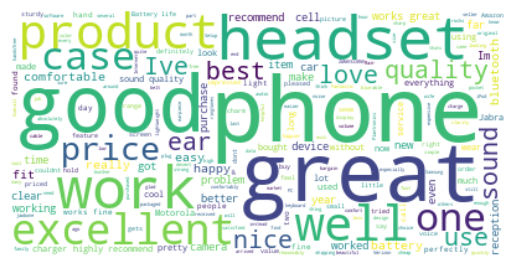

In [61]:
pos_words_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
)
pos_words_wc.generate(" ".join(pos_df_words))

import matplotlib.pyplot as plt

plt.imshow(pos_words_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

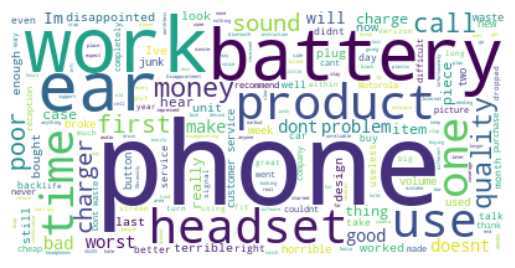

In [62]:
neg_words_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
)
neg_words_wc.generate(" ".join(neg_df_words))

import matplotlib.pyplot as plt

plt.imshow(neg_words_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* Generate TF-IDF features from the tokens of each text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)

tfidf_vect = TfidfVectorizer()
df_tfidf = tfidf_vect.fit_transform(df.sentence.dropna())

weights = np.asarray(df_tfidf.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tfidf_vect.get_feature_names_out(), 'weight': weights})
tfidf_vect.get_feature_names_out()

m = pd.DataFrame(data = df_tfidf.toarray(),
                 index = df.sentence,
                 columns = tfidf_vect.get_feature_names_out())


* Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(df_tfidf.toarray(), df[:].score, test_size=0.5, random_state=0)

gnb = GaussianNB()

y_pred_tfidf = gnb.fit(X_train_tfidf, y_train_tfidf).predict(X_test_tfidf)
print("Number of mislabeled points out of a total %d points : %d" % (X_test_tfidf.shape[0], (y_test_tfidf != y_pred_tfidf).sum()))
print("Accuracy : {}".format(1.0 - (y_test_tfidf != y_pred_tfidf).sum() / X_test_tfidf.shape[0]))

Number of mislabeled points out of a total 490 points : 147
Accuracy : 0.7


In [103]:
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(df_counts.toarray(), df[:].score, test_size=0.5, random_state=0)

gnb = GaussianNB()

y_pred_count = gnb.fit(X_train_count, y_train_count).predict(X_test_count)
print("Number of mislabeled points out of a total %d points : %d" % (X_test_count.shape[0], (y_test_count != y_pred_count).sum()))
print("Accuracy : {}".format(1.0 - (y_test_count != y_pred_count).sum() / X_test_count.shape[0]))

Number of mislabeled points out of a total 490 points : 146
Accuracy : 0.7020408163265306


# Fourth Part

TF-IDF is base of bag-of-words model, therefore it does not capture position in text, semantics, co-occurences in different document, for this reason, TF-IDF is only useful as lexical level capture.

The result of bag-of-words model will be of large dimension and contain many null value resulting in sparse matrix, which will hard to read when you output the matrix or draw it.
you can remove stop words to decrease dimension to get better performance.